In [1]:
# Importing the necessary libraries for data manipulation, visualization, and machine learning tasks.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
# Reading the dataset from a CSV file
df = pd.read_csv('children anemia.csv')

In [105]:
# Checking its dimensions
df.shape

(33924, 17)

In [3]:
# Displaying the first few rows
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [4]:
# Dropping the 'Anemia level' column since we have another column with the same information.
df = df.drop(['Anemia level'], axis=1)

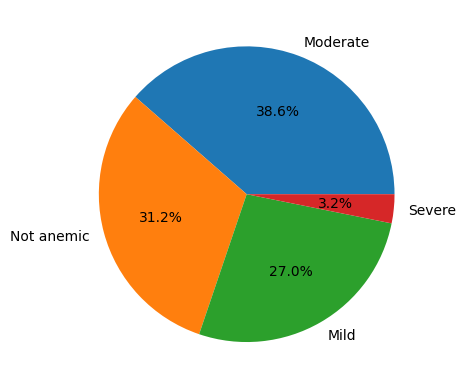

In [5]:
# Plots a pie chart to visualize the distribution of different anemia levels in the dataset.
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

In [6]:
# Helper function that will be used later to add labels to the bar charts we'll be plotting
def addLabels(x, y):
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha="center")

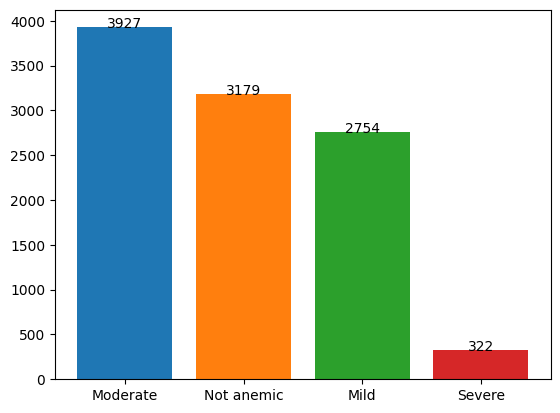

In [7]:
# Plotting a bar chart to show the same distribution of anemia levels
plt.bar(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [8]:
# Identifying columns with missing values.
df.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                                                 12756
Had fever in last two weeks                         

# Filling NAN values with Mean or Unknown

In [10]:
# Handling missing values in the dataset
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean())
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean())
df['When child put to breast'] = df['When child put to breast'].fillna("Unknown")

In [12]:
# Dropping rows where the target variable 'Anemia level.1' or the 'Currently residing with husband/partner' column have missing values
df = df[df["Anemia level.1"].notna()]
df = df[df["Currently residing with husband/partner"].notna()]

In [13]:
# Resetting the index and dropping the old index column.
df = df.reset_index()
df = df.drop(["index"], axis=1)

In [14]:
df.isna().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

In [15]:
df.shape

(9664, 16)

# One Hot Encoding

In [16]:
# Identifying categorical columns (excluding the target variables) and performing one-hot encoding on them using pd.get_dummies
listToChange = []
for i in df.columns:
    if isinstance(df[i][0], str):
        if i != "Anemia level.1" and i != "Anemia level":
            listToChange.append(i)
df = pd.get_dummies(df, columns=listToChange, dtype=int)

In [17]:
df.shape

(9664, 75)

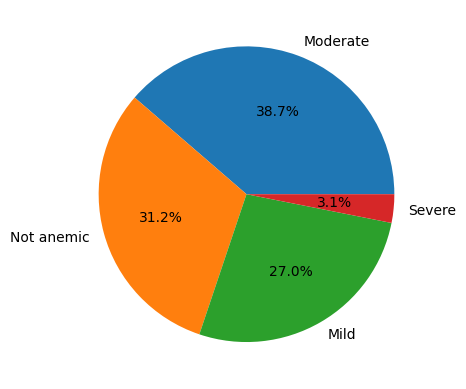

In [18]:
#  Pie chart to visualize the distribution of anemia levels after data preprocessing.
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

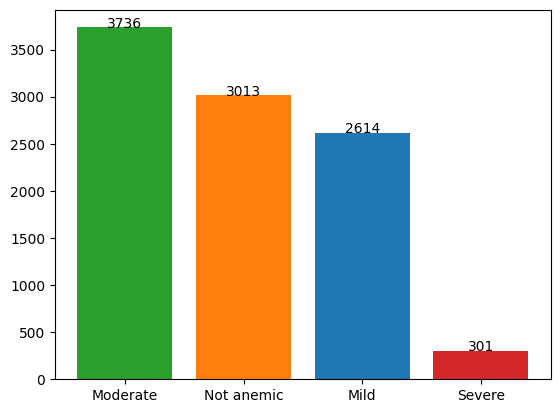

In [19]:
#  Bar chart to visualize the distribution of anemia levels after data preprocessing.
plt.bar(df["Anemia level.1"].value_counts().index, df["Anemia level.1"].value_counts().values, color=['tab:green', 'tab:orange', 'tab:blue', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [20]:
X = df.drop(["Anemia level.1"], axis=1)
y = pd.DataFrame(df["Anemia level.1"])

In [21]:
# Encoding the target variable 'Anemia level.1' using a label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y["Anemia level.1"] = le.fit_transform(y["Anemia level.1"])

<Axes: >

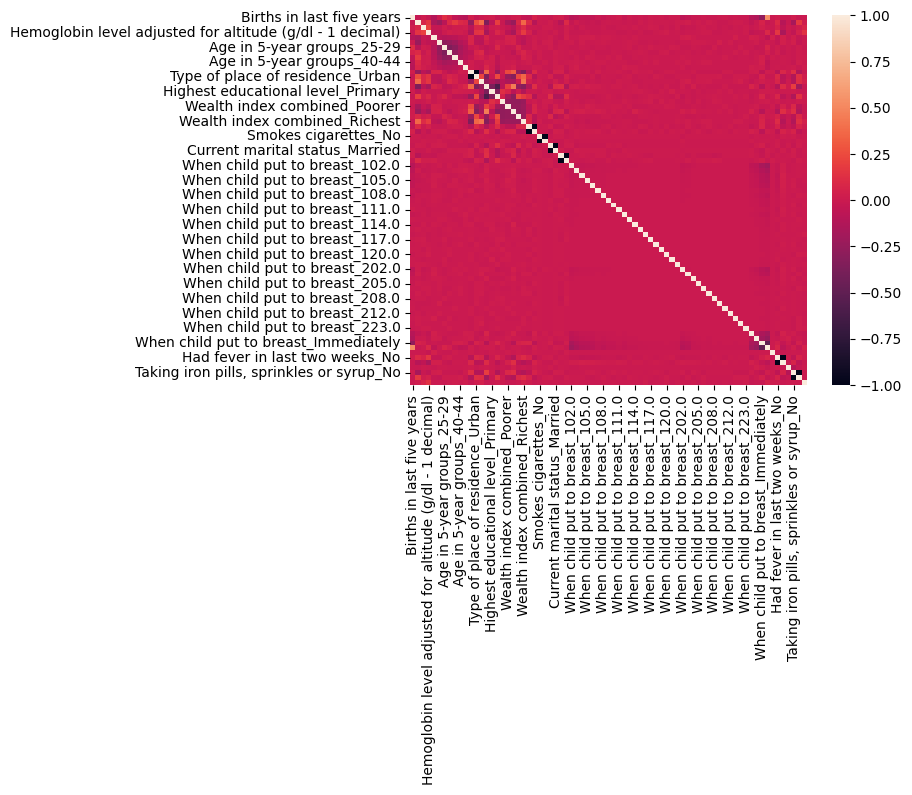

In [22]:
# visualize the correlation between features and the target variable
sns.heatmap(pd.concat([X,y], axis=1).corr())

<BarContainer object of 74 artists>

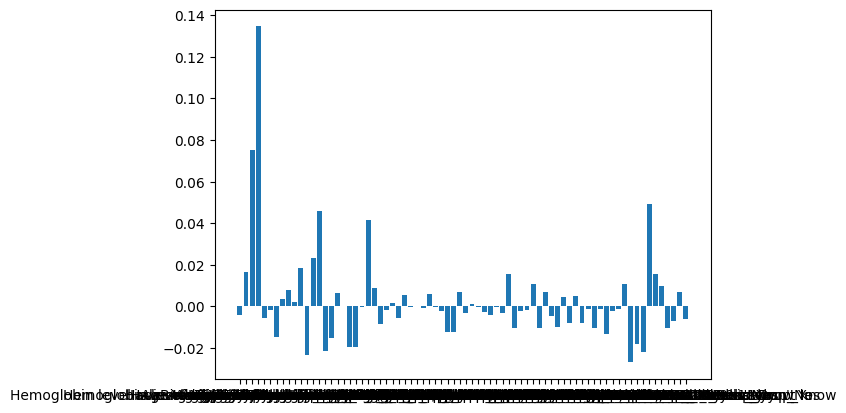

In [23]:
plt.bar(pd.concat([X,y], axis=1).corr()['Anemia level.1'].index[:-1], pd.concat([X,y], axis=1).corr()['Anemia level.1'].values[:-1])

# Model Selection with Default Parameters

65.44231764097258
Logistic Regression Accuracy: 65.44
[[154 142 224   0]
 [ 97 613  34  12]
 [105  30 467   0]
 [  0  24   0  31]]
100.0
Decision Tree Accuracy: 100.00
[[520   0   0   0]
 [  0 756   0   0]
 [  0   0 602   0]
 [  0   0   0  55]]
98.39627521986549
Random Forest Accuracy: 98.40
[[519   1   0   0]
 [  0 756   0   0]
 [  0   0 602   0]
 [  0  30   0  25]]
17.12364200724263
Naive Bayes Accuracy: 17.12
[[100   6   5 409]
 [ 26   8  20 702]
 [ 28   5 170 399]
 [  0   0   2  53]]
98.65494050698396
SVM Accuracy: 98.65
[[519   1   0   0]
 [  5 751   0   0]
 [  8   0 594   0]
 [  0  12   0  43]]
97.25814795654422
KNN Accuracy: 97.26
[[499  12   9   0]
 [  5 750   0   1]
 [ 20   0 582   0]
 [  0   6   0  49]]


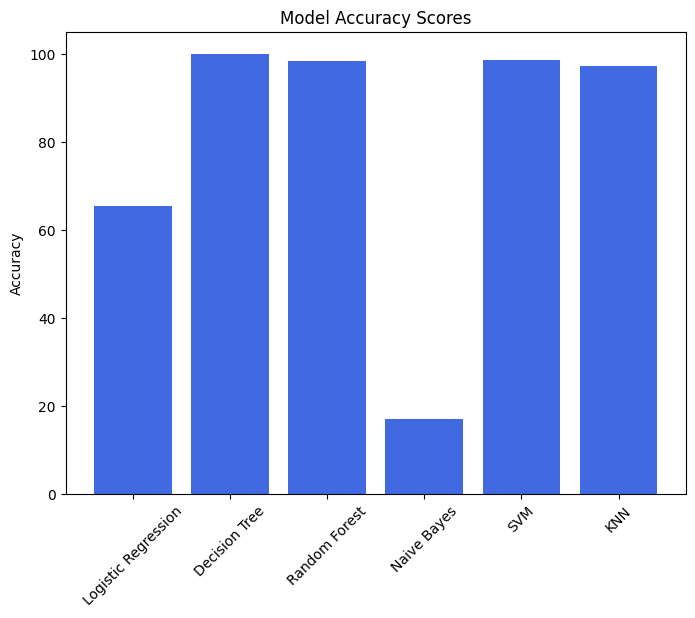

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
   'Logistic Regression': LogisticRegression(),
   'Decision Tree': DecisionTreeClassifier(),
   'Random Forest': RandomForestClassifier(),
   'Naive Bayes': GaussianNB(),
   'SVM': SVC(),
   'KNN': KNeighborsClassifier(),
}

# Train and evaluate models
results = {}

for name, model in models.items():
   with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      results[name] = accuracy * 100
      print(results[name])
      print(f'{name} Accuracy: {results[name]:.2f}')
      print(confusion_matrix(y_true=y_test, y_pred=model.predict(X_test)))

# Plot accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(results)), list(results.values()), align='center', color='royalblue')
plt.xticks(range(len(results)), list(results.keys()), rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Scores')
plt.show()

In [25]:
# Model performance with Hyperparameter tuning and dimensionality reduction techniques.
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# !pip3 install umap-learn
import umap.umap_ as umap

# defining the hyperparameter search spaces for each model and the UMAP dimensionality reduction technique.
logistic_regression_params = {'logisticregression__C': [0.1, 1, 10]}
decision_tree_params = {'decisiontreeclassifier__max_depth': [3, 5, 7]}
random_forest_params = {'randomforestclassifier__n_estimators': [100, 200, 300]}
umap_params = {'umap__n_neighbors': [5, 10, 15], 'umap__min_dist': [0.1, 0.3, 0.5]}
knn_params = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}
svm_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}

# Define models with hyperparameter tuning and dimension reduction
pipelines = {
    'logistic_regression': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('logisticregression', LogisticRegression())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('logisticregression', LogisticRegression())])
    ],
    'decision_tree': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('decisiontreeclassifier', DecisionTreeClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('decisiontreeclassifier', DecisionTreeClassifier())])
    ],
    'random_forest': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('randomforestclassifier', RandomForestClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('randomforestclassifier', RandomForestClassifier())])
    ],
    'naive_bayes': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('naivebayes', GaussianNB())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('naivebayes', GaussianNB())])
    ],
    'KNN': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('kneighborsclassifier', KNeighborsClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('kneighborsclassifier', KNeighborsClassifier())])
    ],
    'SVM': [
        Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)), ('svc', SVC())]),
        Pipeline([('scaler', StandardScaler()), ('umap', umap.UMAP(n_components=2)), ('svc', SVC())])
    ],
}

# Train and evaluate models with hyperparameter tuning
results = {}
for name, pipelines_list in pipelines.items():
    pca_results, umap_results = [], []
    for i, pipeline in enumerate(pipelines_list):
        param_grid = {} if name == 'naive_bayes' else eval(f'{name.lower()}_params') if 'umap' not in [step[0] for step in pipeline.steps] else umap_params
        model_name = f"{name} ({pipeline.steps[-2][0]})"
        model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        if i == 0:
            pca_results.append((model_name, accuracy * 100, model.best_params_, precision, recall, f1))
        else:
            umap_results.append((model_name, accuracy * 100, model.best_params_, precision, recall, f1))
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}')
        print(f'Best Parameters: {model.best_params_}')
        print(confusion_matrix(y_true=y_test, y_pred=model.predict(X_test)))

    results[name] = {'PCA': pca_results, 'UMAP': umap_results}

# Print results
for name, techniques in results.items():
    print(f"\n{name}:")
    for technique, models in techniques.items():
        print(f"\n{technique}:")
        for model_name, accuracy, best_params, precision, recall, f1 in models:
            print(f"{model_name}: {accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Best Parameters: {best_params}")

# Convert results to a list of tuples for plotting
results_list = [(name, results[name]) for name in results]

# Plot accuracy scores
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = np.arange(len(results_list))

for technique in ['PCA', 'UMAP']:
    accuracies = [sum([accuracy for _, accuracy, _, _, _, _ in models if accuracy != 0]) for _, techniques in results_list for name, models in techniques.items() if name == technique]
    plt.bar(index if technique == 'PCA' else index + bar_width, accuracies, bar_width, label=technique)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Scores')
plt.xticks(index + bar_width / 2, [name for name, _ in results_list], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


logistic_regression (pca) Accuracy: 0.93
Precision: 0.93, Recall: 0.93, F1-score: 0.93
Best Parameters: {'logisticregression__C': 10}
[[468  23  29   0]
 [ 27 721   0   8]
 [ 36   1 565   0]
 [  0  15   0  40]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


logistic_regression (umap) Accuracy: 0.50
Precision: 0.45, Recall: 0.50, F1-score: 0.44
Best Parameters: {'umap__min_dist': 0.5, 'umap__n_neighbors': 15}
[[ 38 335 147   0]
 [ 60 593 103   0]
 [ 24 247 331   0]
 [  5  43   7   0]]
decision_tree (pca) Accuracy: 0.59
Precision: 0.59, Recall: 0.59, F1-score: 0.59
Best Parameters: {'decisiontreeclassifier__max_depth': 7}
[[216 177 127   0]
 [170 524  48  14]
 [170  53 379   0]
 [  1  40   0  14]]


KeyboardInterrupt: 